# PreviousOne

Trains model on synthetic data .

In [1]:
import sys
sys.path.append('../..')


In [2]:
from numpy import ones, convolve, ndarray, maximum, concatenate, apply_along_axis, mean
from tqdm import tqdm
from model_compra_comigo.data_handler import DataSimulator
from model_compra_comigo.data_handler import DataHandler
import tensorflow as tf
from numpy import arange
import numpy as np
import tensorflow_datasets as tfds
import gc


2023-07-25 13:36:34.810783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 13:36:34.864387: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 13:36:34.866735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 13:36:36.784398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


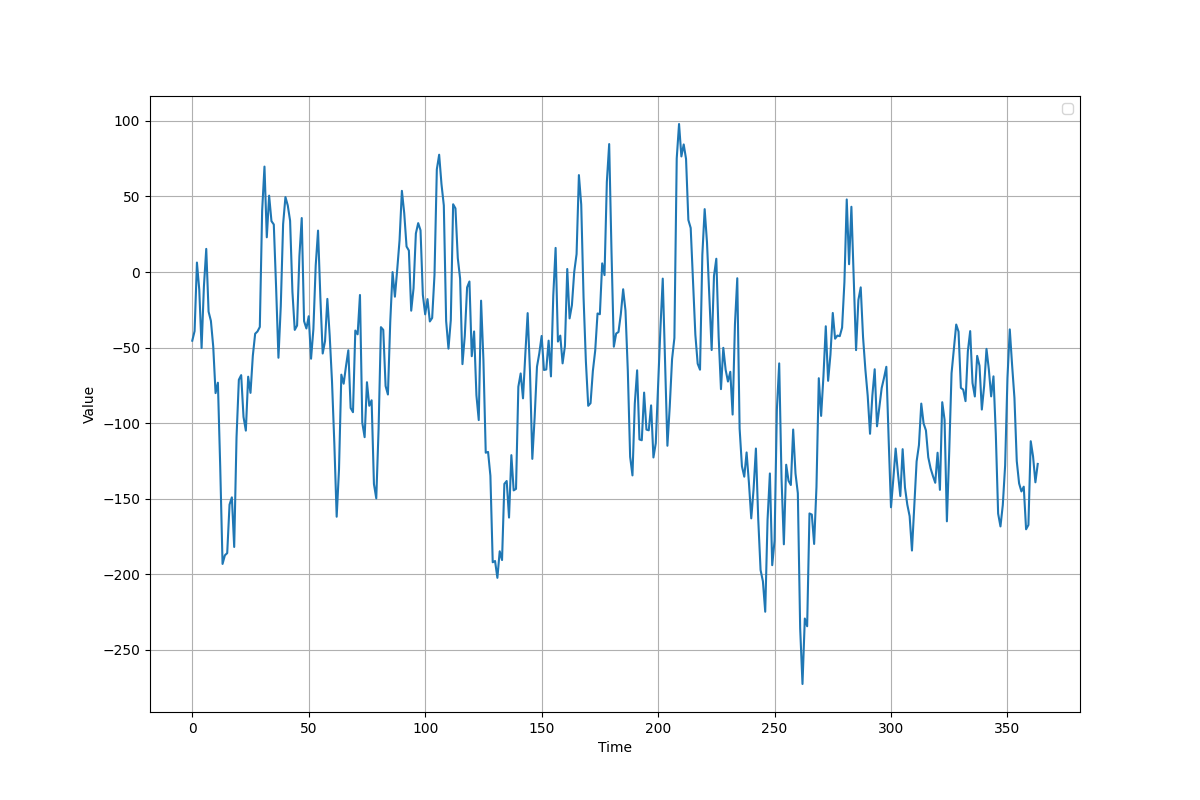

In [4]:
time_range = 365
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

image = data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)

image

# Trains and tests some models
Experimentation

In [5]:
window_size = 40
nforecast = 30
batch_size = 26
shuffle_buffer_size = 10000

## Naive Models


### Previous One
Naive "Model" using only Previous One (used as a possible baseline model to compare the performance of others)

In [6]:
from model_compra_comigo.model import PreviousOneModel


In [7]:
model = PreviousOneModel()


### Creates data for evaluation and for prediction

#### Data for evaluation

In [8]:
data = data_handler.generate_windowed_dataset(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
    shuffle_buffer_size = shuffle_buffer_size,
    nforecast = nforecast
)


#### Data for prediction

In [9]:
data_f = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)

### Predict

In [10]:
prediction = model.predict_batch(
    data=data_f,
    window_size=window_size,
    nforecast=nforecast
)
prediction.shape

2023-07-25 13:36:40.043674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]
2023-07-25 13:36:40.044227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]


(326, 30)

In [11]:
import pandas as pd
pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,...,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338,31.679338
1,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,...,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193,49.641193
2,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,...,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707,44.068707
3,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,...,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416,33.978416
4,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,...,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565,-13.077565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,...,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542,-111.953542
322,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,...,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334,-122.124334
323,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,...,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168,-139.151168
324,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,...,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128,-126.980128


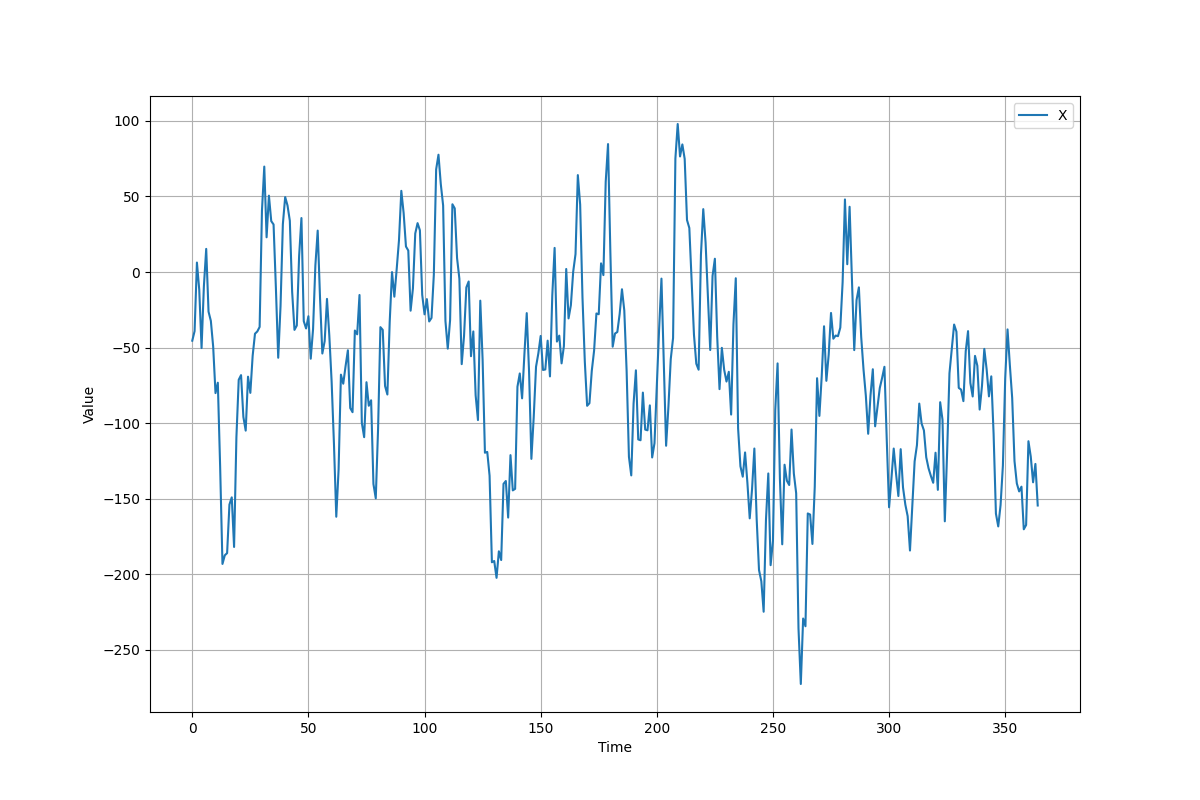

In [12]:
image = data_handler.plot_all(
    series_lines = [(time_data, series)],
    labels_lines = ["X"],
    labels_points = ["prediction"],
    xy_label = ["Time", "Value"],
)
image

In [13]:
data_np = data_handler.convert_tensorflow_dataset_to_numpy(data_f)


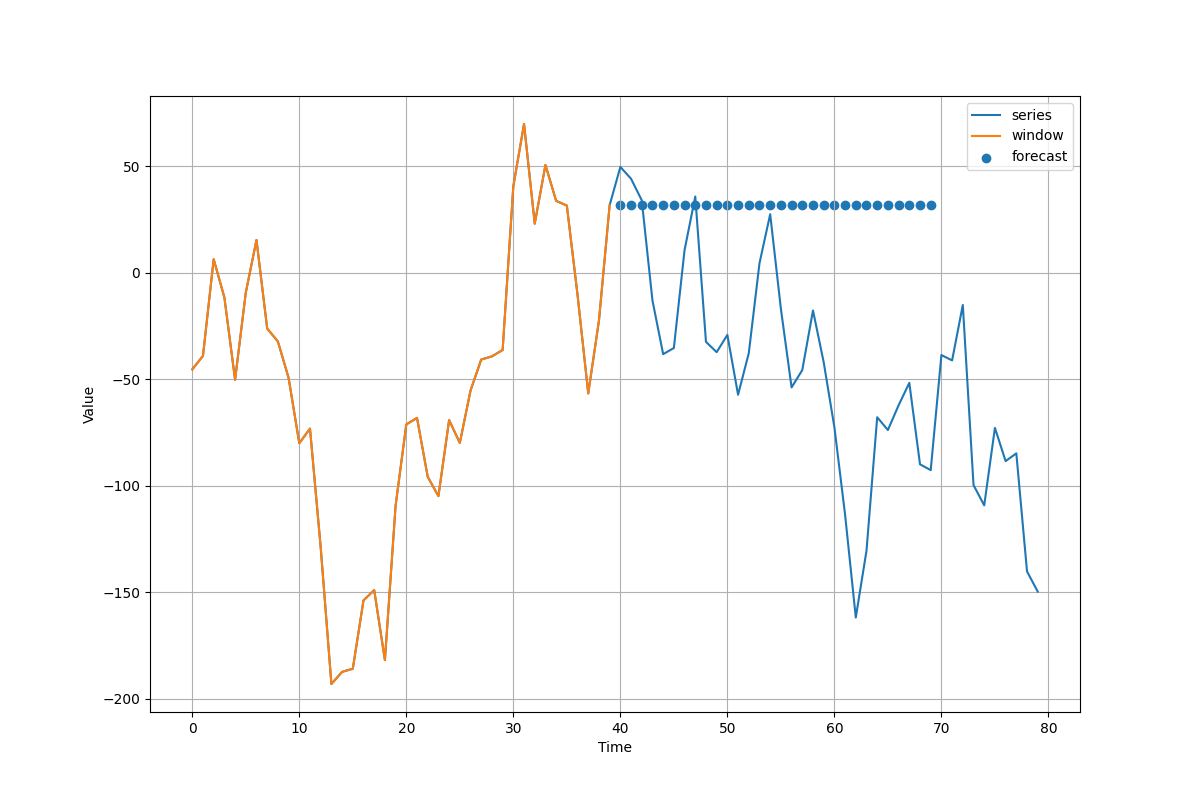

In [14]:
data_handler.plot_all(
    series_lines = [
                    (time_data[:80], series[:80]),
                    (time_data[:window_size], data_np[0][0]),
                   ],
    series_points = [(time_data[window_size:window_size+nforecast], prediction[0])],
    labels_lines = ["series", "window"],
    labels_points = ["forecast"],
    xy_label = ["Time", "Value"],
)

In [44]:
model.evaluate(
    data=data,
    window_size=window_size,
    nforecast=nforecast
)

2023-07-25 12:54:47.007966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]
2023-07-25 12:54:47.008479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]


{'mse': 5468.396180543538, 'mae': 58.3216093034876}

0it [00:00, ?it/s]
 85%|████████████████████████████████████▍      | 22/26 [00:06<00:01,  3.52it/s]
0it [00:06, ?it/s]


KeyboardInterrupt: 

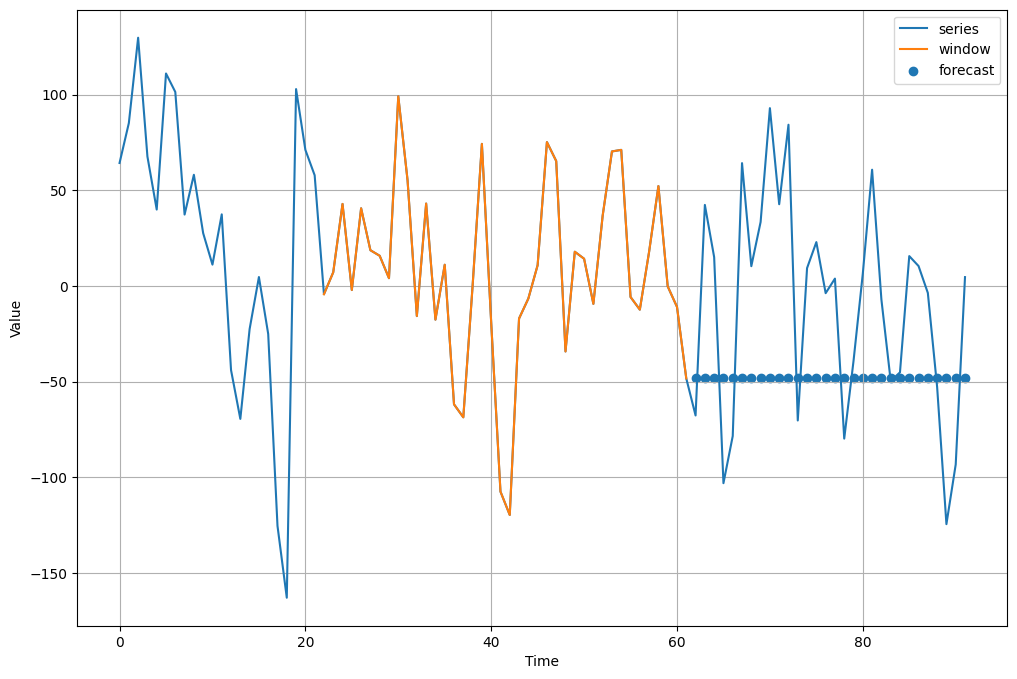

In [45]:
plots = []

for i, example in enumerate(tqdm(data_f)):
    forecast = apply_along_axis(
        func1d=model.predict,
        axis=-1,
        arr=example.numpy(),
        nforecast=nforecast
    )
    n = forecast.shape[0]
    for j in tqdm(range(0, n)):
        ind = i*batch_size+j
        X = list(time_data[np.minimum(window_size+ind, len(time_data)):np.minimum(window_size+nforecast+ind, len(time_data))])
        if not X:
            X = [time_data[-1]+1]
        if len(X) < nforecast:
            X = X + list(range(X[-1]+1, X[-1]+nforecast+1-len(X)))
        plot = data_handler.plot_all(
            series_lines = [
                            (time_data[np.maximum(0,ind-70):70+ind], series[np.maximum(0,ind-70):70+ind]),
                            (time_data[ind:window_size+ind], data_np[j][i]),
                           ],
            series_points = [(X, forecast[j])],
            labels_lines = ["series", "window"],
            labels_points = ["forecast"],
            xy_label = ["Time", "Value"],
        )
        plots.append(plot)
    gc.collect()


In [17]:
plots[0].save('./tmp/previous_one.gif',
             save_all = True, append_images = plots[1:], 
             optimize = False, duration = 100)

In [18]:
from model_compra_comigo.data_handler import Visualizer

visualizer = Visualizer()

In [19]:
plots = visualizer.create_gif(
    time_data=time_data,
    series=series,
    forecast=prediction,
    batch_size=batch_size,
    window_size=window_size,
    nforecast=nforecast,
    gif_window=70,
    generate_full_visualization=False
)


In [20]:
plots[0].save('./tmp/previous_one_2.gif',
             save_all = True, append_images = plots[1:], 
             optimize = False, duration = 100)

In [56]:
prediction[-1].shape, nforecast

((30,), 30)

In [69]:
new_pts = (np.array(range(time_data[-1]+1, time_data[-1]+nforecast+1)))
new_pts.shape, prediction.shape

((30,), (326, 30))

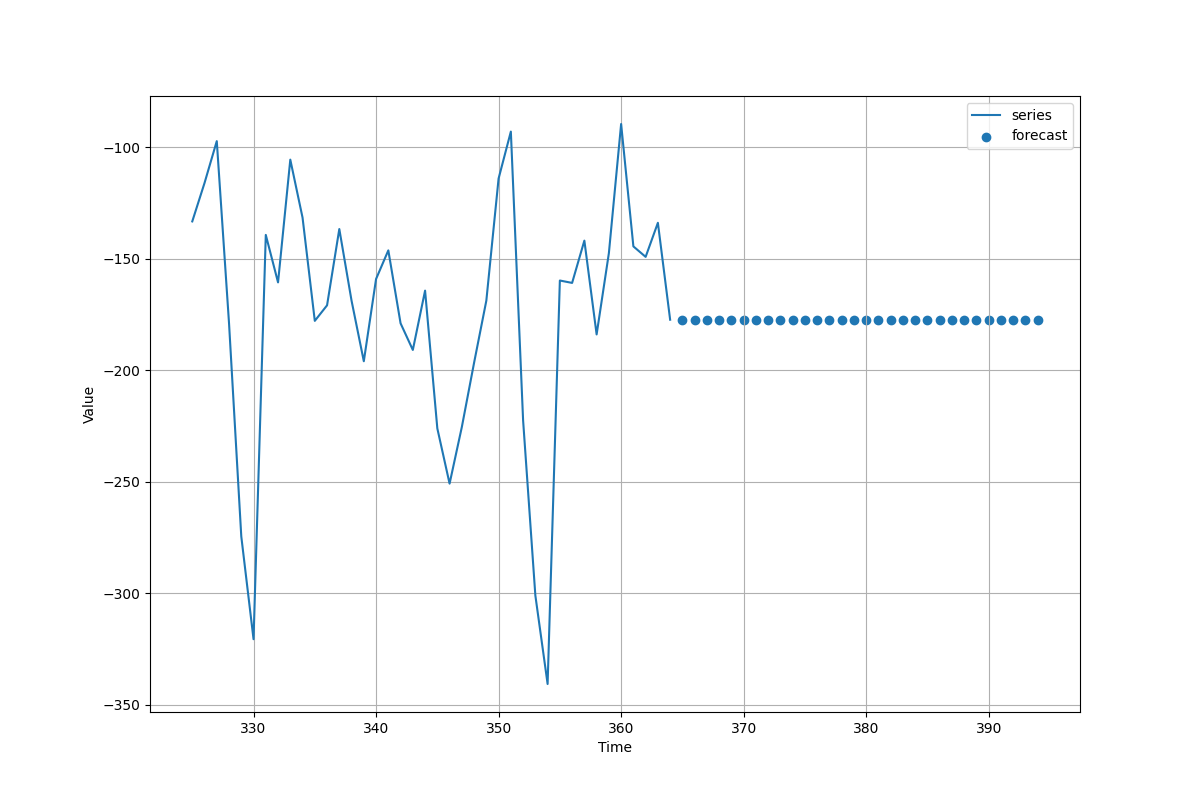

In [70]:
plot = DataHandler.plot_all(
    series_lines=[
        (time_data[-window_size:], series[-window_size:]),
    ],
    series_points=[(new_pts, prediction[-1])],
    labels_lines=["series", "window"],
    labels_points=["forecast"],
    xy_label=["Time", "Value"],
)
plot